https://data.fs.usda.gov/geodata/rastergateway/treecanopycover/docs/tccPecora20.20171109.3.pdf

In [ ]:
#pip install descartes
#https://geopandas.org/gallery/plotting_basemap_background.html#sphx-glr-gallery-plotting-basemap-background-py

In [ ]:
# Libraries that this notebook will use:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from datascience import *
from matplotlib.colors import ListedColormap
import re
# Helps the maps display nicely in the notebook:
%matplotlib inline
plt.rcParams['figure.figsize'] = [30, 20]
# Tells the notebook not to display warnings:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import IFrame

# HOLC areas
**We have data for these areas in California: Fresno, Los Angeles, San Francisco, San Jose, Stockton, San Diego, Oakland.**

<img src="http://s3.amazonaws.com/holc/tiles/MN/Minneapolis/19XX/holc-scan.jpg" width="300"/>

# The Homeowner's Loan Corporation Survey (HOLC)
> The Mapping Inequality dataset on PolicyMap comprises of neighborhood risk assessment data for 148 cities across the US. The Federal Home Loan Bank Board (FHLBB), the HOLC’s parent organization, commissioned the City Survey Program in 1935 to collect data on real estate risk levels across 239 cities. As part of the exercise, each neighborhood was evaluated via a network of realtors, lenders, developers, and HOLC staff members, and ultimately assigned a rating or letter grade which signified the neighborhood’s *investment prospects for lending*. The rating was primarily a function of neighborhood racial and ethnic makeup, housing conditions, and access to public facilities, among other factors. **Ratings assigned to neighborhoods included: “A-Best”, “B-Still Desirable”, “C-Definitely Declining”, and “D-Hazardous”.**

> The HOLC maps were part of a broader landscape of housing and lending policies during the 1930s and 1940s, and it is worth noting that there is a strong body of literature suggesting that the HOLC maps were more a consequence of existing discriminatory lending practices, as opposed to being a cause for them. Other studies have also tried to empirically show how the HOLC grades were more a function of factors such as housing condition, residential density, and housing type, as opposed to solely ethnic and racial composition. Several scholars have conducted a deeper analysis of HOLC maps for specific regions such as Philadelphia,PA, Richmond,VA, and Hartford,CT, in order to explore local factors and players involved in neighborhood classification.

-- from [PolicyMap](https://www.policymap.com/2017/07/holc-historic-lending-guideline-maps-policymap/)

   **A - "Best", green**
   
   **B - "Still Desirable", blue**
   
   **C - "Definitely Declining", yellow**
   
   **D - "Hazardous", red**

Data and images are sourced from the [Mapping Inequality: Redlining in New Deal America Project](https://dsl.richmond.edu/panorama/redlining).

## Now let's create the historical map of Minneapolis seen above with Geopandas.

## First, read in the shapefiles to Geopandas to create a GeoDataframe. The shapefile folder is name is called `holc_minneapolis`.

In [43]:
from matplotlib.colors import ListedColormap

# Create a ListedColormap object called holc_cmap, pass in the list of colors
light_blue = '#99c2ff'
light_red = '#ff8080'
light_green = '#84e184'
light_yellow = '#ffe680'
holc_cmap = ListedColormap([light_green, light_blue, light_yellow , light_red], name='holc_colors')

# Fresno

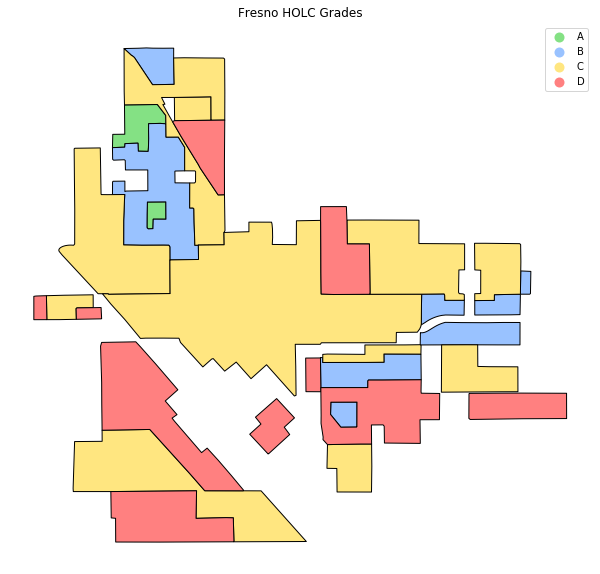

In [46]:
fres_import = gpd.read_file('holc_fresno')
fres_import.plot(column = 'holc_grade', cmap = holc_cmap, legend = True, figsize=[18, 10])
plt.title('Fresno HOLC Grades')
plt.axis('off');

# Los Angeles

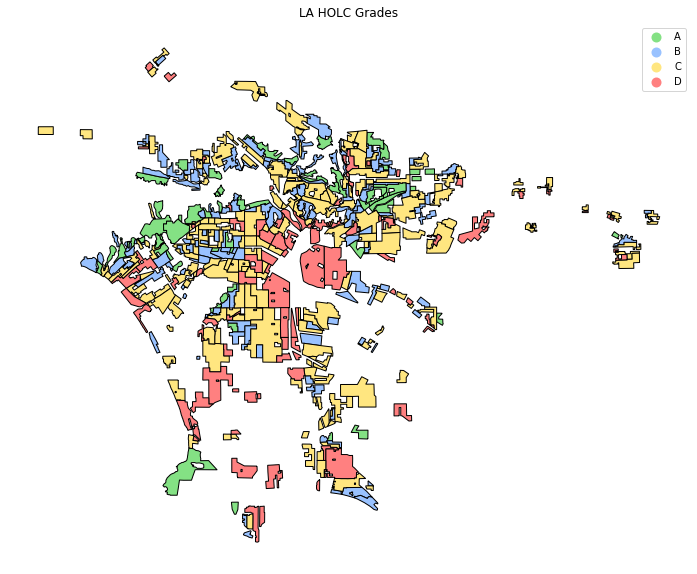

In [47]:
la_import = gpd.read_file('holc_la')
la_import.plot(column = 'holc_grade', cmap = holc_cmap, legend = True, figsize=[18, 10])
plt.title('LA HOLC Grades')
plt.axis('off');

# Stockton

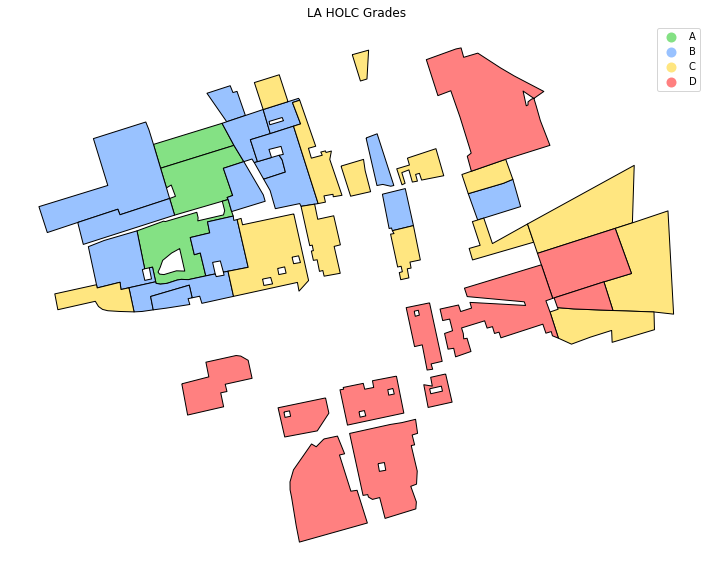

In [48]:
stockton = gpd.read_file('holc_stockton')
stockton.plot(column = 'holc_grade', cmap = holc_cmap, legend = True, figsize=[18, 10])
plt.title('LA HOLC Grades')
plt.axis('off');

# San Francisco

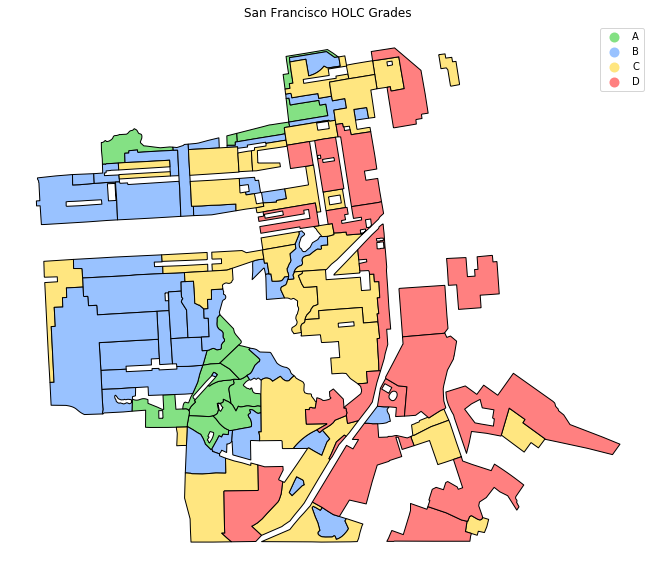

In [49]:
sf = gpd.read_file('holc_sf')
sf.plot(column = 'holc_grade', cmap = holc_cmap, legend = True, figsize=[18, 10])
plt.title('San Francisco HOLC Grades')
plt.axis('off');

# San Jose

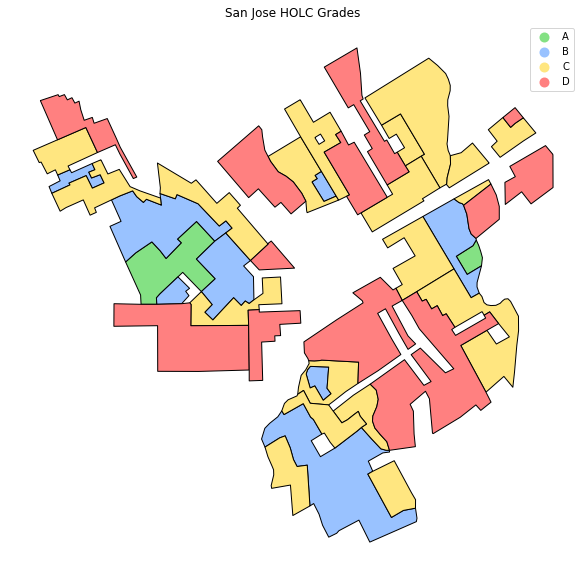

In [50]:
sj = gpd.read_file('holc_sj')
sj.plot(column = 'holc_grade', cmap = holc_cmap, legend = True, figsize=[18, 10])
plt.title('San Jose HOLC Grades')
plt.axis('off');

# Oakland

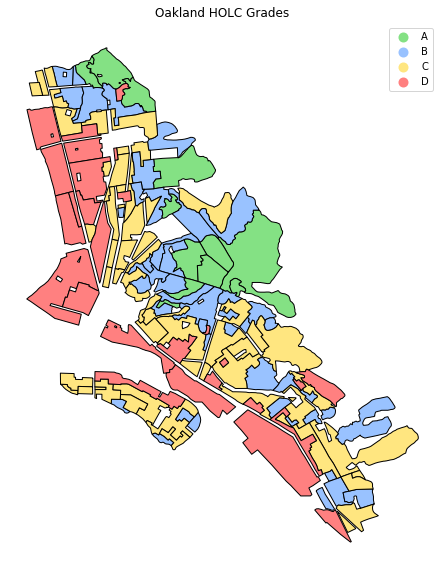

In [51]:
oakland = gpd.read_file('holc_oakland')
oakland.plot(column = 'holc_grade', cmap = holc_cmap, legend = True, figsize=[18, 10])
plt.title('Oakland HOLC Grades')
plt.axis('off');

# San Diego

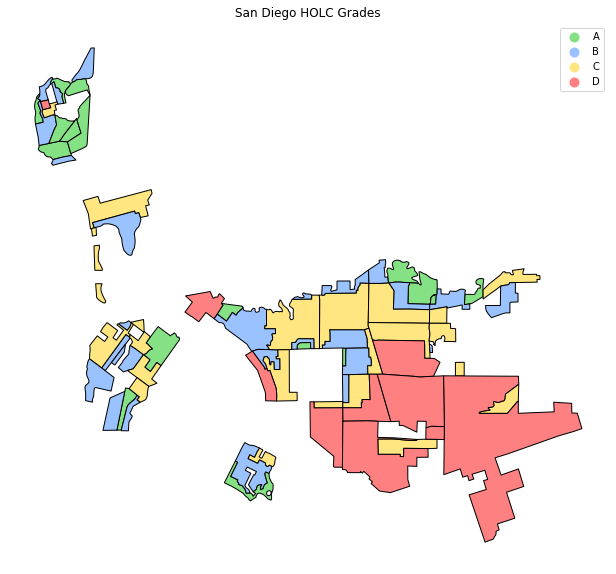

In [52]:
sandiego = gpd.read_file('holc_sd')
sandiego.plot(column = 'holc_grade', cmap = holc_cmap, legend = True, figsize=[18, 10])
plt.title('San Diego HOLC Grades')
plt.axis('off');

# Combining with 2000 Census
County codes: https://www.census.gov/prod/techdoc/cbp/cbp95/st-cnty.pdf

## Los Angeles

In [53]:
census2000 = gpd.read_file("census2000")
census2000.head()

,AREA,PERIMETER,TR06_D00_,TR06_D00_I,STATE,COUNTY,TRACT,NAME,LSAD,LSAD_TRANS,geometry
0,0.058290,1.303878,2,1,06,093,0004,0004,TR,None,"POLYGON ((-122.87032 42.00331, -122.80008 42.0..."
1,0.155340,2.227876,3,2,06,093,0003,0003,TR,None,"POLYGON ((-122.36818 42.00932, -122.28953 42.0..."
2,0.346458,3.272025,4,3,06,093,0005,0005,TR,None,"POLYGON ((-123.23076 42.00384, -123.19236 42.0..."
3,0.148798,2.018557,5,4,06,093,0002,0002,TR,None,"POLYGON ((-122.16133 42.00764, -122.16044 42.0..."
4,0.227852,3.327617,6,5,06,015,000202,0002.02,TR,None,"POLYGON ((-124.21161 41.99846, -124.12619 41.9..."


In [55]:
la_county = census2000[census2000['COUNTY']=='037']

#getting rid of island(?)
geometries_str = la_county['geometry'].apply(lambda x: x.wkt).values
n = la_county[['33.4' not in i for i in geometries_str]]

geometries_str2 = n['geometry'].apply(lambda x: x.wkt).values
n2 = n[['33.3' not in i for i in geometries_str2]]

geometries_str3 = n2['geometry'].apply(lambda x: x.wkt).values
n3 = n2[['32.9' not in i for i in geometries_str3]]


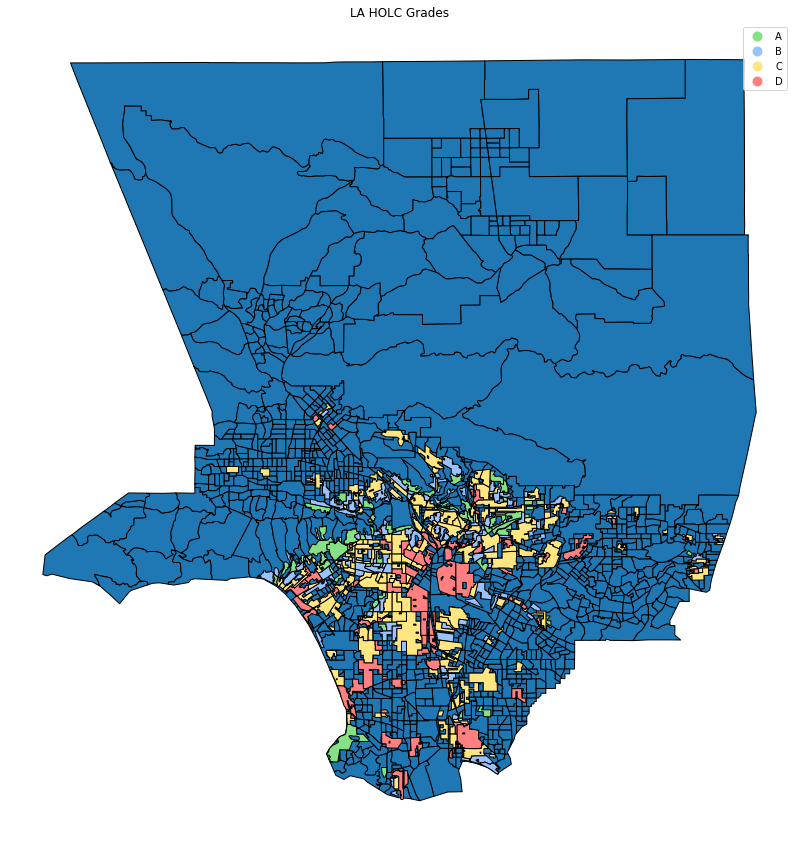

In [56]:
base = n3.plot(figsize=(15, 15))
holc_cmap = ListedColormap([light_green, light_blue, light_yellow, light_red], name='holc_colors')
la_import.plot(ax= base, column = 'holc_grade', cmap = holc_cmap, legend = True, figsize=[18, 10])
plt.title('LA HOLC Grades')
plt.axis('off');

#how do i change the default color?

## Stockton

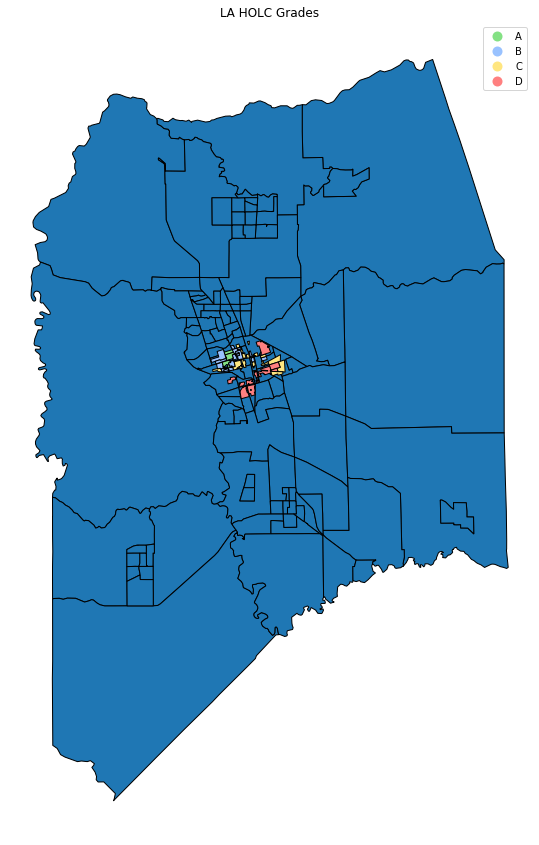

In [57]:
sanjoaq_county = census2000[census2000['COUNTY']=='077']
base = sanjoaq_county.plot(figsize=(15, 15))
stockton = gpd.read_file('holc_stockton')
stockton.plot(ax= base, column = 'holc_grade', cmap = holc_cmap, legend = True, figsize=[18, 10])
plt.title('LA HOLC Grades')
plt.axis('off');

## Fresno


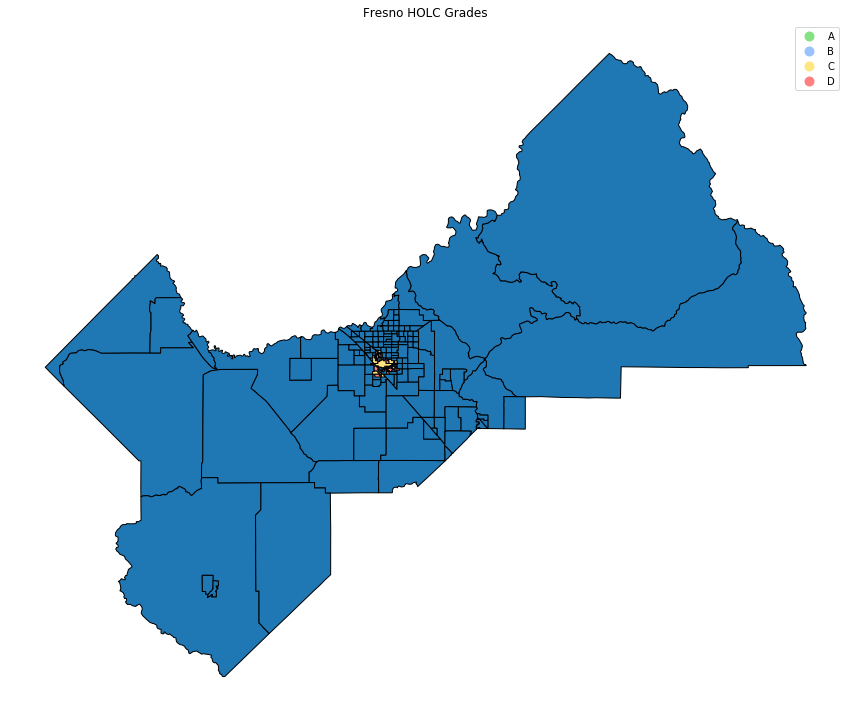

In [61]:
fres_county = census2000[census2000['COUNTY']=='019']
base = fres_county.plot(figsize=(15, 15))

fres_import = gpd.read_file('holc_fresno')
fres_import.plot(ax=base, column = 'holc_grade', cmap = holc_cmap, legend = True, figsize=[18, 10])
plt.title('Fresno HOLC Grades')
plt.axis('off');

## San Francisco

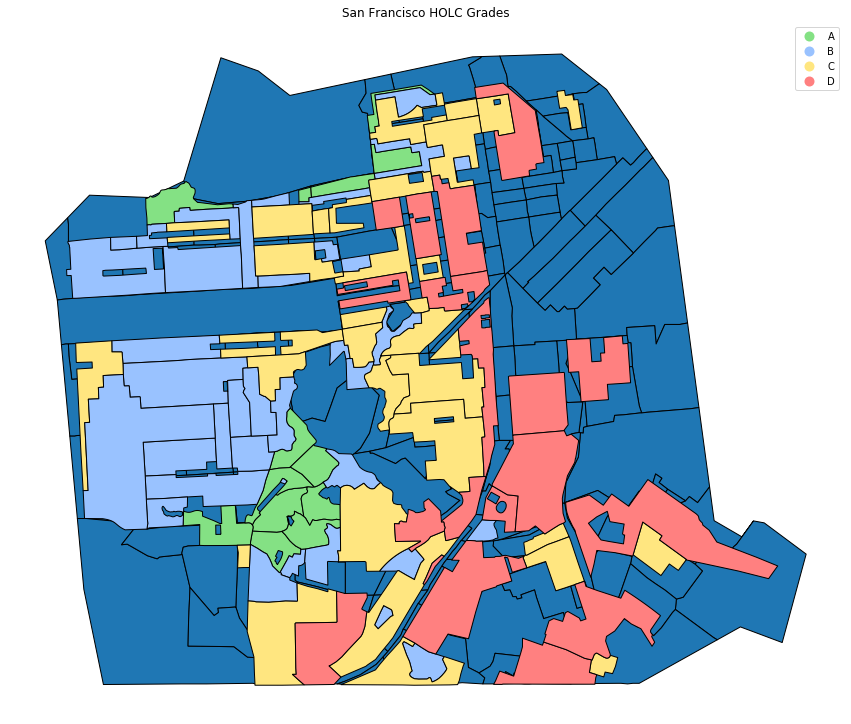

In [62]:
sf_county_1 = census2000[census2000['COUNTY']=='075']


geometries_str = sf_county_1['geometry'].apply(lambda x: x.wkt).values
sf_county_2 = sf_county_1[['-123' not in i for i in geometries_str]]

geometries_str_2 = sf_county_2['geometry'].apply(lambda x: x.wkt).values
sf_county_3 = sf_county_2[['37.82' not in i for i in geometries_str_2]]
base = sf_county_3.plot(figsize=(15, 15))

sf = gpd.read_file('holc_sf')
sf.plot(ax =base, column = 'holc_grade', cmap = holc_cmap, legend = True, figsize=[18, 10])
plt.title('San Francisco HOLC Grades')
plt.axis('off');

## San Jose

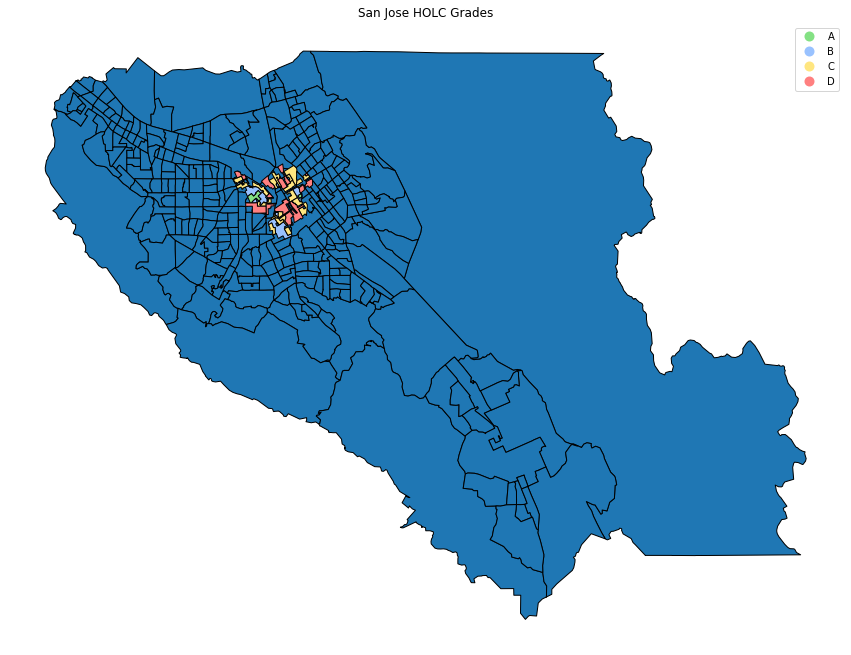

In [72]:
santa_clara = census2000[census2000['COUNTY']=='085']
base = santa_clara.plot(figsize=(15, 15))
sj = gpd.read_file('holc_sj')
sj.plot(ax = base, column = 'holc_grade', cmap = holc_cmap, legend = True, figsize=[18, 10])
plt.title('San Jose HOLC Grades')
plt.axis('off');

## Oakland

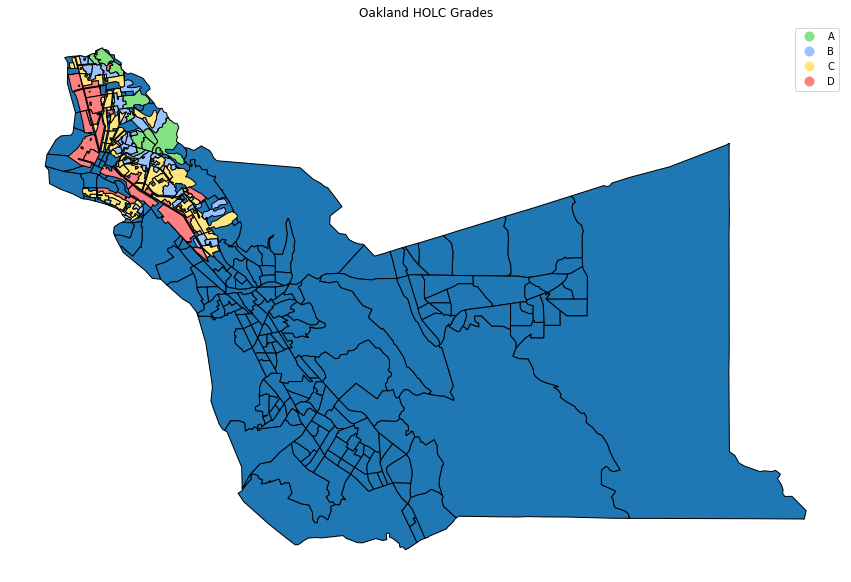

In [71]:
alameda_county = census2000[census2000['COUNTY']=='001']
base = alameda_county.plot(figsize=(15, 15))
oakland = gpd.read_file('holc_oakland')
oakland.plot(ax = base, column = 'holc_grade', cmap = holc_cmap, legend = True, figsize=[18, 10])
plt.title('Oakland HOLC Grades')
plt.axis('off');

## San Diego

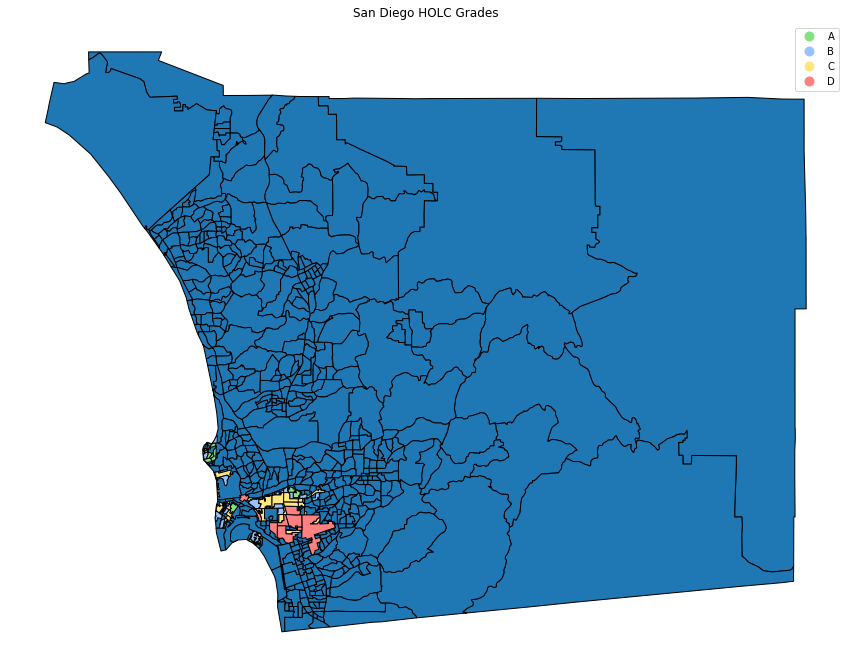

In [66]:
sd_county = census2000[census2000['COUNTY']=='073']
base = sd_county.plot(figsize=(15, 15))

sandiego = gpd.read_file('holc_sd')
sandiego.plot(ax=base, column = 'holc_grade', cmap = holc_cmap, legend = True, figsize=[18, 10])
plt.title('San Diego HOLC Grades')
plt.axis('off');